# Working with Data APIs

**Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [13]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [14]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [12]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1486489088000,"url":"http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.4","count":185},"features":[{"type":"Feature","properties":{"mag":5.1,"place":"87km ENE of Visokoi Island, South Georgia and the South Sandwich Islands","time":1486477598760,"updated":1486482462040,"tz":-120,"url":"http://earthquake.usgs.gov/earthquakes/eventpage/us20008i84"


In [15]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [16]:
data

{'bbox': [-179.399, -57.0138, -0.54, 179.6155, 76.2096, 589.03],
 'features': [{'geometry': {'coordinates': [-25.8834, -56.3917, 10],
    'type': 'Point'},
   'id': 'us20008i84',
   'properties': {'alert': None,
    'cdi': None,
    'code': '20008i84',
    'detail': 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us20008i84.geojson',
    'dmin': 18.136,
    'felt': None,
    'gap': 70,
    'ids': ',us20008i84,',
    'mag': 5.1,
    'magType': 'mb',
    'mmi': None,
    'net': 'us',
    'nst': None,
    'place': '87km ENE of Visokoi Island, South Georgia and the South Sandwich Islands',
    'rms': 0.63,
    'sig': 400,
    'sources': ',us,',
    'status': 'reviewed',
    'time': 1486477598760,
    'title': 'M 5.1 - 87km ENE of Visokoi Island, South Georgia and the South Sandwich Islands',
    'tsunami': 0,
    'type': 'earthquake',
    'types': ',geoserve,origin,phase-data,',
    'tz': -120,
    'updated': 1486482462040,
    'url': 'http://earthquake.usgs.gov/earthquakes/eventp

In [10]:
data.keys()

dict_keys(['type', 'bbox', 'metadata', 'features'])

In [11]:
data['bbox']

[-179.399, -57.0138, -0.54, 179.6155, 76.2096, 589.03]

In [9]:
data['type']

'FeatureCollection'

In [10]:
data['metadata']

{'api': '1.5.4',
 'count': 226,
 'generated': 1486057676000,
 'status': 200,
 'title': 'USGS Magnitude 2.5+ Earthquakes, Past Week',
 'url': 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson'}

In [19]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'properties': {'nst': None, 'rms': 0.63, 'ids': ',us20008i84,', 'place': '87km ENE of Visokoi Island, South Georgia and the South Sandwich Islands', 'felt': None, 'mag': 5.1, 'type': 'earthquake', 'magType': 'mb', 'updated': 1486482462040, 'status': 'reviewed', 'gap': 70, 'url': 'http://earthquake.usgs.gov/earthquakes/eventpage/us20008i84', 'sources': ',us,', 'time': 1486477598760, 'code': '20008i84', 'dmin': 18.136, 'types': ',geoserve,origin,phase-data,', 'mmi': None, 'detail': 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us20008i84.geojson', 'title': 'M 5.1 - 87km ENE of Visokoi Island, South Georgia and the South Sandwich Islands', 'net': 'us', 'tz': -120, 'sig': 400, 'cdi': None, 'alert': None, 'tsunami': 0}, 'geometry': {'coordinates': [-25.8834, -56.3917, 10], 'type': 'Point'}, 'type': 'Feature', 'id': 'us20008i84'}


In [20]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-25.8834, -56.3917, 10], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '20008i84',
 'detail': 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us20008i84.geojson',
 'dmin': 18.136,
 'felt': None,
 'gap': 70,
 'ids': ',us20008i84,',
 'mag': 5.1,
 'magType': 'mb',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '87km ENE of Visokoi Island, South Georgia and the South Sandwich '
          'Islands',
 'rms': 0.63,
 'sig': 400,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1486477598760,
 'title': 'M 5.1 - 87km ENE of Visokoi Island, South Georgia and the South '
          'Sandwich Islands',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,phase-data,',
 'tz': -120,
 'updated': 1486482462040,
 'url': 'http://earthquake.usgs.gov/earthquakes/eventpage/us20008i84'}


In [17]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

NameError: name 'quakes' is not defined

In [14]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

226


In [15]:
# print the first few lines of data

print(df.head())

   depth  magnitude
0   87.5        2.5
1   97.6        2.5
2   75.0        3.6
3   10.0        4.9
4  170.0        2.9


In [18]:
df = df.sort('magnitude')

C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [19]:
# print some descriptive statistics

print(df.describe())

            depth   magnitude
count  226.000000  226.000000
mean    59.172965    3.778053
std     85.186612    0.969785
min     -0.280000    2.460000
25%     10.000000    2.802500
50%     31.230000    3.650000
75%     77.202500    4.675000
max    558.050000    5.900000


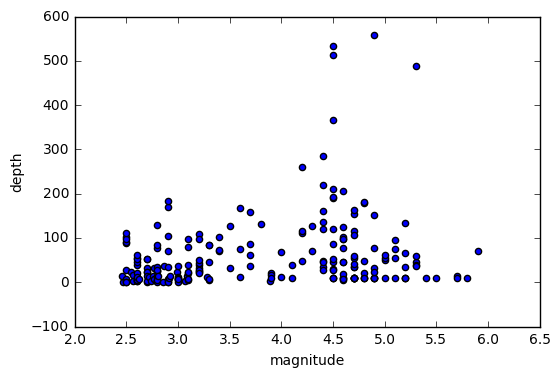

In [20]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [21]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [22]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

     depth  magnitude
108  14.89       2.46
186   0.87       2.47
117   5.00       2.50
0    87.50       2.50
89    5.00       2.50


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [23]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [24]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [25]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'status': 'OK', 'results': [{'formatted_address': '401 Hilltop Ave, Lexington, KY 40506, USA', 'address_components': [{'long_name': '401', 'short_name': '401', 'types': ['street_number']}, {'long_name': 'Hilltop Avenue', 'short_name': 'Hilltop Ave', 'types': ['route']}, {'long_name': 'Lexington', 'short_name': 'Lexington', 'types': ['locality', 'political']}, {'long_name': 'Fayette County', 'short_name': 'Fayette County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Kentucky', 'short_name': 'KY', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '40506', 'short_name': '40506', 'types': ['postal_code']}, {'long_name': '0001', 'short_name': '0001', 'types': ['postal_code_suffix']}], 'types': ['establishment', 'library', 'point_of_interest'], 'place_id': 'ChIJ4TWVhLhEQogRoRWbSlkOZZY', 'geometry': {'location_type': 'APPROXIMATE', 'viewport': {'southwest': {'

In [26]:
# print it more nicely

pp.pprint(data)

{'results': [{'address_components': [{'long_name': '401',
                                      'short_name': '401',
                                      'types': ['street_number']},
                                     {'long_name': 'Hilltop Avenue',
                                      'short_name': 'Hilltop Ave',
                                      'types': ['route']},
                                     {'long_name': 'Lexington',
                                      'short_name': 'Lexington',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Fayette County',
                                      'short_name': 'Fayette County',
                                      'types': ['administrative_area_level_2',
                                                'political']},
                                     {'long_name': 'Kentucky',
                                      'short_name': 'KY',
               

In [27]:
data['results'][0]

{'address_components': [{'long_name': '401',
   'short_name': '401',
   'types': ['street_number']},
  {'long_name': 'Hilltop Avenue',
   'short_name': 'Hilltop Ave',
   'types': ['route']},
  {'long_name': 'Lexington',
   'short_name': 'Lexington',
   'types': ['locality', 'political']},
  {'long_name': 'Fayette County',
   'short_name': 'Fayette County',
   'types': ['administrative_area_level_2', 'political']},
  {'long_name': 'Kentucky',
   'short_name': 'KY',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': 'United States',
   'short_name': 'US',
   'types': ['country', 'political']},
  {'long_name': '40506', 'short_name': '40506', 'types': ['postal_code']},
  {'long_name': '0001',
   'short_name': '0001',
   'types': ['postal_code_suffix']}],
 'formatted_address': '401 Hilltop Ave, Lexington, KY 40506, USA',
 'geometry': {'location': {'lat': 38.0328721, 'lng': -84.5017179},
  'location_type': 'APPROXIMATE',
  'viewport': {'northeast': {'lat': 38.03422108

In [28]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

38.0328721 -84.5017179


### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

In [30]:
import json    
import requests 

import pprint  
pp = pprint.PrettyPrinter()

In [31]:
endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'Newport Aquarium'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=Newport+Aquarium


# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [32]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [33]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [34]:
consumer_key

'Bv0IwVzDqMTvWwrrDznsltjth'

In [35]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [42]:
# most recent tweet from @UKAthletics's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 3
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text']+'\n')

Game day for @KentuckyWBB vs. No. 4/6 South Carolina. Got your blue picked out? #OneMemorial https://t.co/khkQZaV1JY

Students, we need you there for @KentuckyWBB's Blue Out tomorrow night vs. South Carolina. It's going to be all kin… https://t.co/RbILYPueCH

.@UKCoachStoops preaches "don't flinch" to his team constantly. Turns out his recruits got the message too.

👇… https://t.co/Ig9obHjDs1



In [39]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Feb 02 14:08:25 +0000 2017',
 'entities': {'hashtags': [{'indices': [80, 92], 'text': 'OneMemorial'}],
              'media': [{'display_url': 'pic.twitter.com/khkQZaV1JY',
                         'expanded_url': 'https://twitter.com/UKAthletics/status/827156722359926785/photo/1',
                         'id': 827156644287090688,
                         'id_str': '827156644287090688',
                         'indices': [93, 116],
                         'media_url': 'http://pbs.twimg.com/media/C3qmleRWEAAGDh2.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/C3qmleRWEAAGDh2.jpg',
                         'sizes': {'large': {'h': 1024,
                                             'resize': 'fit',
                                             'w': 2048},
                                   'medium': {'h': 600,
                                              'resize': 'fit',
                    

### Other API endpoints allow different types of searches

In [40]:
# search for public tweets about #bart

endpoint = 'search/tweets'
params = {
    'q': '#kentuckywildcats', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @Kentuckyhot: #BBN #Kentuckywildcats #weareuk #universityofkentucky #collegebasketball #collegegameday #collegegirls #body #kentuckygirl…

RT @uk_fb_fanly: NSD 2017: Kentucky Wildcats Offensive Signee Bios #KentuckyWildcats  https://t.co/X7vBNANusk https://t.co/SalkHL94qC

RT @Kentuckyhot: #BBN #Kentuckywildcats #weareuk #universityofkentucky #collegebasketball #collegegameday #collegegirls #body #kentuckygirl…

RT @Kentuckyhot: #BBN #Kentuckywildcats #weareuk #universityofkentucky #collegebasketball #collegegameday #collegegirls #body #kentuckygirl…

RT @Kentuckyhot: #BBN #Kentuckywildcats #weareuk #universityofkentucky #collegebasketball #collegegameday #collegegirls #body #kentuckygirl…



In [46]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @AmitShah: अहमदाबाद में अपनी विधानसभा नारणपुरा के क्षेत्रवासियों के साथ उत्तरायण का पर्व मनाया | https://t.co/cQEnsEAXxd

@Aashi_81 सब ठीक हो जाएगा

उत्तर प्रदेश कश्मीर बनने की और अग्रसर ! कैराना पर कैराना ! #Vote4BJP #ModiBoostsEconomy #ModiSutra https://t.co/a7VgQ1OwM7

RT @Santosh87013098: शुभ रात्रि मित्रों आप  आराम फरमाये मै कंजर को भागने से रोकने जा रहा हूँ (कंजर मैं चला अपने दोस्त हाफिज के पास मोदी जी…

RT @prshntmnhr: @ArvindKejriwal @HasanSafin sir neet ko lekar kuchh boliye
Humlog paise kharch kar chuke he



In [47]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@ronedmondson @DBoggsOWL @yoshinofarmky @WKYT @Houseofgodinc lovehiggins4lex @alarmour14… https://t.co/857XIqcQCh

When your campaign manager is famous. @yoshinofarmky… https://t.co/H57zi0lnNS

@LexingtonForum breakfast: Heroin Epidemic in Our Own Backyard #sharethelex #owenby4lex⚖️ @WKYT… https://t.co/yVYy0LUEGc

Unique late afternoon clouds over Lexington and University of Kentucky #striatedsky… https://t.co/zbxxtqyiae

If you missed us last week were back at it again. Come join us tonight!! Fine Arts 6:15 room… https://t.co/Iih3RaZKq0



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [56]:
endpoint = 'search/tweets'
params = {
    'q' : '*',
    'lang' : 'ge',
    'count' : 3
}

r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

seen lang ge bye

POTA SINO PQEDE TANUNGIN DITO PARA SA THESIS KO LANG GE NA GUYS

Lol convo with ex:
Ex: Uy may gf na ako
Me: Nice! Congrats :)
E: Bakit hindi ka malungkot?
M:Bakit ako malulungkot?
Ex: Ah wala lang, ge bye



In [57]:
endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': '', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

TwitterRequestError: Twitter request failed (403)

### Bonus: Streaming live tweets in real time 

In [58]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Thu Feb 02 18:38:38 +0000 2017
Torrance, CA, United States
@Franklyaghost Or...The Hokey Pokey

Thu Feb 02 18:38:38 +0000 2017
Juiz de Fora, Brasil, Brasil
@victorbrandon_ mas onde eu disse que ele não tem capacidade irmão

Thu Feb 02 18:38:38 +0000 2017
Matinhos, Brasil, Brasil
Esse filme da sessão da tarde é pafude mesmo, fofo

Thu Feb 02 18:38:38 +0000 2017
Maceió, Brasil, Brasil
eita minha nossa senhora do ingresso caro https://t.co/PewpdM70li

Thu Feb 02 18:38:38 +0000 2017
Cotia, Brasil, Brasil
Ate os emojis tem as carinhas que meu celular nao tem 😐

Thu Feb 02 18:38:38 +0000 2017
Lyon, France, France
@Psykopathe_ j'ai son fb :/

Thu Feb 02 18:38:38 +0000 2017
Memphis, TN, United States
This is one of the feature of our new vehicle... getting bath right now and pictures will be… https://t.co/9wVe3gakT4

Thu Feb 02 18:38:38 +0000 2017
Stafford, TX, United States
#improve #class is my third class and I missed #breakfast &amp; doing a #dietreset, so no @Whataburger for me...

Thu Fe

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [2]:
import json    
import requests 

import pprint  
pp = pprint.PrettyPrinter()

In [4]:
endpoint_url1 = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response1 = requests.get(endpoint_url1)
results1 = response1.text

# what is the data type of the results?
print(type(results1))

<class 'str'>


In [6]:
data1 = json.loads(results1)

print(type(data1))

<class 'dict'>


In [21]:
d = {'latitude': [q['geometry']['coordinates'][1] for q in quakes],
     'longitude': [q['geometry']['coordinates'][0] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded in the dataframe?
print(len(df))

185


In [22]:
print(df.head())

   latitude   longitude
0  -56.3917  -25.883400
1   18.6425  -66.042900
2   41.4939  142.125500
3  -21.7997 -179.399000
4   38.8050 -122.789665


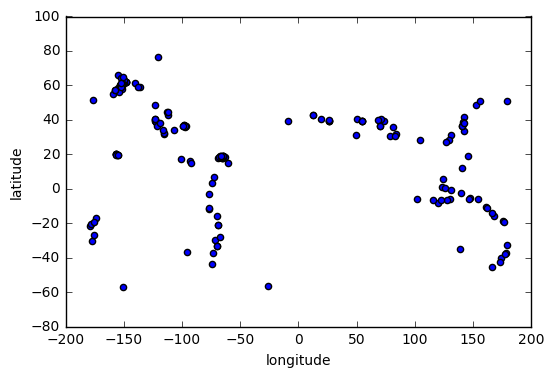

In [24]:
df.plot(x='longitude', y='latitude', kind = 'scatter')

In [25]:
import json    
import requests 

import pprint  
pp = pprint.PrettyPrinter()

In [ ]:
endpoint = 

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
